# Homework 1: Decision tree, K-nearest neighbor, and the Bias-Variance Trade-Off



This assignment is due on Moodle by **11:59pm on Friday Sep 11**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI-4622-Machine-Learning-fa20/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API, **do not** change it.  If we do not provide a function API, then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

**Acknowledgment**: Noah Smith, Chris Ketelsen

**Please put your name and cuidentity key.**

**Name**: Muntaha Pasha

**Identity Key**: mupa0444

In [1]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [30 points] Problem 1 - Decision tree
***

Consider the problem of predicting whether a person has a college degree based on age, salary, and Colorado residency. 
The dataset looks like the following.

| Age   | Salary         | Colorado Residency      | College degree| 
|:------:|:------------:| :-----------:|---:|
| 27 | 41,000 | Yes | Yes |
| 61 | 52,000 | No | No |
| 23 | 24,000 | Yes | No |
| 29 | 77,000 | Yes | Yes |
| 32 | 48,000 | No | Yes |
| 57 | 120,000 | Yes | Yes |
| 22 | 38,000 | Yes | Yes |
| 41 | 45,000 | Yes | No |
| 53 | 26,000 | No | No |
| 48 | 65,000 | Yes | Yes |


**Part 1 [5 points]**: Convert the above table to data. Two variables should be created:
        
1. $x$ is a $10*3$ matrix that contains the data from columns 0, 1, and 2. Colorado residency is represented by 1 (yes) and 0 (no).
2. $y$ contains the labels (college degree), 1 (yes) and 0 (no).

In [2]:
# YOUR CODE HERE
#First let's make our list y, with all the college degrees values.
y = [1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
#Then, let's make our list x with all of the other values grouped as individual lists compiled together into one big array.
x = np.array([[27, 41000, 1], [61, 52000, 0], [23, 24000, 1], [29, 77000, 1], [32, 48000, 0], [57, 120000, 1],
             [22, 38000, 1], [41, 45000, 1], [53, 26000, 0], [48, 65000, 1]])

**Part 2 [16 points]:** Criteria for choosing a feature to split.

**[2 points]** We start with no splitting. Assuming that our algorithm is deterministic, what is the smallest number of mistakes we can make if we do not use any of the features and what is the algorithm? (**Write your answer in the Markdown cell below.**)

**(SOLUTION):**

Our Algorithm tells us that if $\textbf{we don't split on any feature}$, then we simply need to find what the $\textbf{most occurring label}$ is from the data we have. 

For our Parent, we have a majority of YES. In class, we learned that $\textbf{the mistakes we make come from our minority}$. So with the majority being YES, the smallest number of mistakes we can make in total would have to be 4. $\checkmark$

**[5 points]** We start by considering the variable *Colorado residency*. The first criteria is based on the number of mistakes. We need to build a contingency table between Colorado residency and college degree.

How many mistakes will we make if we split based on Colorado residency? (**Answer below by finishing the code.**)

**SOURCES USED:**

1 - (Understanding np.array versus list) https://stackoverflow.com/questions/9220372/python-numpy-array-vs-list

2 - (Format Function in Python) https://www.tutorialspoint.com/python-format-function

In [3]:
def get_error_in_leaf(y, ids):
    """
    Returns the errors in a leaf node of a decision tree.
    This function can be used to answer the previous question automatically.
    
    :@param y: all labels
    :@param ids: the subset of indexes in the leaf node
    """
    # YOUR CODE HERE
    #Make counts for all the One and Zero we find
    OnesFound = 0
    ZeroesFound = 0
    #For our indexes in leaf nodes, check if at the index, the leaf is a 1 or a 0
    for i in ids:
        #If one, increment count for one
        if(y[i] == 1):
            OnesFound = OnesFound + 1
        #If zero, increment count for zero
        elif(y[i] ==0):
            ZeroesFound = ZeroesFound + 1
        #Else nothing
        else:
            print("Error")
    #Return whatever the minimum value was, as that is our mistakes
    minval = min(OnesFound, ZeroesFound)
    return minval
            

def error_criteria(y, root, left_child, right_child):
    """
    Returns the number of errors if we split the root into the left child and the right child.
    
    :@param y: all labels
    :@param root: indexes of all the data points in the root
    :@param left_child: the subset of indexes in the left child
    :@param right_child: the subset of indexes in the right child
    """
    # YOUR CODE HERE
    #Get mistakes for left
    Left = get_error_in_leaf(y, left_child)
    #Get mistakes for right
    Right = get_error_in_leaf(y, right_child)
    #Total error is sum of mistakes
    ErrorVal = Left + Right
    #Return total error
    return ErrorVal

def value_split_binary_feature(x, y, fid, root, criteria_func):
    #Commenting out root to list, since I am making it a list in the test.
    #root = root.tolist()
    left_child = [i for i in root if x[i, fid] == 0]
    right_child = [i for i in root if x[i, fid] == 1]
    return criteria_func(y, root, left_child, right_child)

# Colorado residency should correpsond to the third column in your data x
fid = 2
#Making root variable not a np array.
root = list(range(len(y))) # root includes all data points
mistakes = value_split_binary_feature(x, y, fid, root, error_criteria)

#Now print out how many mistakes there are.
print("Number of Mistakes Found is {}".format(mistakes))

Number of Mistakes Found is 3


In [4]:
# This cell is for grading purposes only; please ignore

**[3 points]** Alternatively, we can use information gain to split the data. To get you familiar with MathJax, please write the equation necessary to compute information gain if we split data $D$ into $D_1$ and $D_2$. **Write your answer in the Markdown cell below.**

**(SOLUTION):**

Our Information Gain Equation in this case will be...

$$IG(D \rightarrow D_1, D_2) = H(D) - \frac{|D_1|}{|D|}H(D_1) - \frac{|D_2|}{|D|}H(D_2)$$

In this Equation, $H$ represents our Entropy Function, which is written as...

$$H(x) = -plog_2(p) - (1-p)log_2(1-p)$$

$p$ is our $\textbf{fraction of positive}$ within class $x$. $\checkmark$

**[6 points]** Now we write a function for computing information gain. Use log2 for entropy computation.

In [5]:
def entropy(y, ids):
    """
    Returns the entropy in the labels for the data points in ids.
    
    :@param y: all labels
    :@param ids: the indexes of data points
    """
    if len(ids) == 0: # deal with corner case when there is no data point.
        return 0
    # YOUR CODE HERE
    #Count of the positives.
    positives = 0
    #For each in ids
    for each in ids:
        #If the index i of label y has a value of 1, then it is a positive, and we add one to our count.
        if(y[each] == 1):
            positives = positives + 1
    #From this calculation now that we have the number of the positives, we can divide it by total length.
    p_val = (positives/len(ids))
    #As long as p is not 1 or 0, we do the entropy function, if it is, return 0.
    if(p_val == 1 or p_val == 0):
        return 0
    else:
        #Calculate entropy
        entropy_func = -(p_val * math.log(p_val, 2)) - ((1 - p_val) * math.log(1 - p_val, 2))
        return entropy_func
    
def information_gain_criteria(y, root, left_child, right_child):
    """
    Returns the information gain by splitting root into left child and right child.
    
    :@param y: all labels
    :@param root: indexes of all the data points in the root
    :@param left_child: the subset of indexes in the left child
    :@param right_child: the subset of indexes in the right child
    """
    # YOUR CODE HERE
    #Find Entropy of Root
    entropy_root = entropy(y, root)
    #Find Entropy of Left Child
    entropy_left = entropy(y, left_child)
    #Find Entropy of Right Child
    entropy_right = entropy(y, right_child)
    #Take the Absolute value of the Entropy Values
    rootVal = (abs(len(root)))
    leftVal = (abs(len(left_child)))
    rightVal = (abs(len(right_child)))
    #Combine each part of the InfoGain formula separately
    partLeft = (leftVal/rootVal) * (entropy_left)
    partRight = (rightVal/rootVal) * (entropy_right)
    #Putting it all together, we have our Info Gain.
    InformationGain = entropy_root - partLeft - partRight
    return InformationGain
               
    
fid = 2
#Making root variable not a np array, just list
root = list(range(len(y))) # root includes all data points
info_gain = value_split_binary_feature(x, y, fid, root, information_gain_criteria)    

#Now print out the information gain we got.
print("The Information Gain Found is approximately {0:.4g}".format(info_gain))

The Information Gain Found is approximately 0.09128


In [6]:
# This cell is for grading purposes only; please ignore

**Part 3 [9 points]**: Deal with continuous features.
    
**[6 points]** One way to deal with continuous (or ordinal) data is to define binary features based on thresholding of continuous features like Age and Salary.
For example, you might convert ages to 0 if age is less than or equal to 50 and 1 otherwise.

**SOURCES USED:**

1 - (Understanding Nested One-Line Loops in Python) https://stackoverflow.com/questions/17006641/single-line-nested-for-loops

2 - (Fixing my Array Error for Root Var, changed it to list) https://stackoverflow.com/questions/43007100/python-typeerror-object-of-type-numpy-int32-has-no-len

In [7]:
def value_split_continuous_feature(x, y, fid, root, criteria_func=information_gain_criteria):
    """
    Return the best value and its corresponding threshold by splitting based on a continuous feature.

    :@param x: all feature values
    :@param y: all labels
    :@param fid: feature id to split the tree based on
    :@param root: indexes of all the data points in the root
    :@param criteria_func: the splitting criteria function
    """
    best_value, best_thres = 0, 0
    # YOUR CODE HERE
    #First lets look in our root to find the values that are declared there
    for val in root:
        #First get the right hand values for the right child
        right = [k for k in root if x[k, fid] >= x[val, fid]]
        #Then the left hand values for the left child
        left = [m for m in root if x[m, fid] < x[val, fid]]
        #Compute our information gain with all labels, root, left child, and the right child
        InformationGain = criteria_func(y, root, left, right)
        #If the information gain found is bigger than our best value..
        if(InformationGain > best_value):
            #Update best threshold.
            best_thres = x[val, fid]
            #Update the best value then to have the new information gain. We want to maximize info gain.
            best_value = InformationGain
    return best_value, best_thres

#Making root variable not a np array, just list.
root = list(range(len(y))) # root includes all data points
fid = 0
age_value, age_thres = value_split_continuous_feature(x, y, fid, root, information_gain_criteria)
fid = 1
salary_value, salary_thres = value_split_continuous_feature(x, y, fid, root, information_gain_criteria)

#Printing Findings
print("Max Info Gain for age is {}, and it has a threshold of under about {}".format(age_value, age_thres))
print("--------------------------------------------------------------------------------------------")
print("Max Info Gain for salary is {}, and it has a threshold of under about {}".format(salary_value, salary_thres))

Max Info Gain for age is 0.1444843438056279, and it has a threshold of under about 61
--------------------------------------------------------------------------------------------
Max Info Gain for salary is 0.3219280948873623, and it has a threshold of under about 38000


In [8]:
# This cell is for grading purposes only; please ignore

In [9]:
# This cell is for grading purposes only; please ignore

**[3 points]** Based on the current information gain by splitting different features, if we build a decision stump (decision tree with depth 1) greedily, which feature should we choose? Why? **Write down your answer in the Markdown cell below.**

**(SOLUTION):**

If we wanted to use the $\textbf{greedy}$ approach to building a decision stump, then we would choose the $\textbf{salary}$ feature to be the one we split on, because it returns a $\textbf{higher information gain}$ than age does. For greedy, we are looking at $\textbf{max Infomation Gain}$, therefore salary is what we need to pick. $\checkmark$

**Extra credit [5 points]**: You now have all the ingredients to build a decision tree recursively. You can build a decision tree of depth two and report its classification error on the training data and the tree.

**SKIPPED THIS PORTION**

In [10]:
class LeafNode:
    """
    Class for leaf nodes in the decision tree
    """
    
    def __init__(self, label, count, total):
        """
        :@param label: label of the leaf node
        :@param count: number of data points with class 'label' falling in this leaf
        :@param count: number of datapoints of any label falling in this leaf
        """
        self.label = label
        self.count = count
        self.total = total
        
    def predict(self, x):
        """
        Return predictions for features x

        :@param x: feature values
        """
        # YOUR CODE HERE
        raise NotImplementedError()
    
    def display(self, feat_names, out_str, depth=0):
        """
        Display contents of a leaf node
        """
        prefix = '\t'*depth
        error = 1.0 - self.count / float(self.total)
        out_str += f'{prefix}leaf: label={self.label}, error={error} ({self.count}/{self.total} correct)\n'
        return out_str
    
class TreeNode:
    """
    Class for internal (non-leaf) nodes in the decision tree
    """
    def __init__(self, feat_id, feat_val):
        """
        :@param feat_id: index of the feature that this node splits on
        :@param feat_val: threshold for the feature that this node splits on
        """
        self.feat_id = feat_id
        self.feat_val = feat_val
        self.left = None
        self.right = None
    
    def split(self, x, root):
        """
        Given the datapoints falling into current node, return two arrays of indices in x corresponding to the
        left and right subtree
        
        :@param x: all feature values
        :@param root: indexes of all the data points in the current node
        """
        root = np.array(root)
        # YOUR CODE HERE
        raise NotImplementedError()
    
    def predict(self, x):
        """
        Return an array of predictions for given 'x' for the current node
        
        :@param x: datapoints
        """
        assert self.left is not None and self.right is not None, 'predict called before fit'
        # YOUR CODE HERE
        raise NotImplementedError()
    
    def display(self, feat_names, out_str, depth=0):
        """
        Display contents of a non-leaf node
        """
        prefix = '\t'*depth
        out_str += f'{prefix}{feat_names[self.feat_id]}\n'
        out_str += f'{prefix}x <= {self.feat_val}\n'
        out_str = self.left.display(feat_names, out_str, depth=depth+1)
        out_str += f'{prefix}x > {self.feat_val}\n'
        out_str = self.right.display(feat_names, out_str, depth=depth+1)
        return out_str

class DecisionTree:
    """
    Class for the decision tree
    """
    def __init__(self, max_depth=1, criteria_func=information_gain_criteria, binary_feat_ids=[]):
        """
        :@param max_depth: Maximum depth that a decision tree can take
        :@param criteria_func: criteria function to split features
        :@param binary_feat_id: list of indexes of binary features
        """
        self.max_depth = max_depth
        self.criteria_func = criteria_func
        self.binary_feat_ids = binary_feat_ids
        self.root = None
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        """
        Fit a tree to the given dataset using a helper function
        """
        self.x = x
        self.y = y
        self.root = self.fit_helper(np.array(list(range(self.x.shape[0]))))
    
    def fit_helper(self, root, depth=1):
        """
        Recursive helper function for fitting a decision tree
        Returns a node (can be either LeafNode or TreeNode)
        
        :@param root: array of indices of datapoints which fall into the current node
        :@param depth: current depth of the tree being built 
        """
        
        """
        Strategy:
        1. If current partition is pure i.e. labels corresponding to all indices in root are the same
           OR the maximum depth has been reached, stop building the tree and return a LeafNode
        2. If not, find out the best feature to split on along with the threshold, create a TreeNode and 
           recursively call fit_helper on the two splits (You can assume the threshold for a binary feature 
           to be 0.5). Finally, return the current node 
        """
        
        # YOUR CODE HERE
        raise NotImplementedError()
    
    def predict(self, x):
        """
        Return predictions for a given dataset  
        """
        assert self.root is not None, 'fit not yet called'
        # YOUR CODE HERE
        raise NotImplementedError()
    
    
    def display(self, feat_names):
        assert self.root is not None, 'fit not yet called'
        out_str = ""
        out_str = self.root.display(feat_names, out_str)
        return out_str

In [11]:
# This cell is for grading purposes only; please ignore
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


### [35 points] Problem 2- KNN for Handwritten Digit Recognition 
***

In this problem you'll implement a K-Nearest Neighbor framework to take an image of a handwritten digit and predict which digit it corresponds to.  

![Samples of Handwritten Digits](figs/mnist.png "MNIST Digits")

To keep run times down we'll only consider the subset of the MNIST data set consisting of the digits $3, 7, 8$ and $9$. 

**Part A [6 points]**: Executing the following cells will load training and validation data and plot an example handwritten digit.  Explore the training and validation sets and answer the following questions: 

- How many pixels are in each image in the data set?  
- How many total examples are there in the training set? 
- How many total examples are there in the validation set? 

**SOURCES USED:**

1 - (Shape Function in Python) https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html

2 - (Hands-On KNN Lecture 09/09/2020 - Jupyter Notebook)

In [12]:
X_train, y_train, X_valid, y_valid = pickle.load(gzip.open("data/mnist21x21_3789.pklz", "rb"))

In [13]:
def view_digit(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(21,21), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)

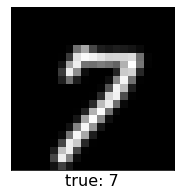

In [14]:
training_index = 0
view_digit(X_train[training_index], y_train[training_index])

In [15]:
# Write code for answering the questions in Part A and then put your answer in the Markdown cell below.
# Make sure to set each of the variables below to the correct value. Do not rename the variables.
N_pixels_per_img = None
N_training_examples = None
N_validation_examples = None
# YOUR CODE HERE
#raise NotImplementedError()
print("---------------Testing Values----------------")
from collections import Counter
counter = Counter(y_train)
print(counter)
print(len(X_train))
print(len(X_valid))
#So our pixels per image, using the shape function helps see the size of your array dimensionally. 
print(X_train.shape)
#It's obvious from printing out the value that the pixels/img is the index 1 value of the return value from .shape
N_pixels_per_img = X_train.shape[1]
#Training examples come from our x train, and so thats the index 0 value of return value from .shape
N_training_examples = len(X_train)
#Validation total examples as confirmed from the shape function and from y_valid is 1000 data points, that's index 0.
N_validation_examples = len(X_valid)
print("---------------Answering Part A---------------")
print("How many pixels are in each image in the data set? {}".format(N_pixels_per_img))
print("How many total examples are there in the training set? {}".format(N_training_examples))
print("How many total examples are there in the validation set? {}".format(N_validation_examples))

---------------Testing Values----------------
Counter({7: 1000, 9: 1000, 3: 1000, 8: 1000})
4000
1000
(4000, 441)
---------------Answering Part A---------------
How many pixels are in each image in the data set? 441
How many total examples are there in the training set? 4000
How many total examples are there in the validation set? 1000


In [16]:
# This cell is for grading purposes only; please ignore

**(SOLUTION):**

As you can see from what the code outputted as well, using the .shape feature in Python to see array dimensionality, I got these answers for each Question.

- How many pixels are in each image in the data set? $\textbf{441}$
- How many total examples are there in the training set? $\textbf{4000}$
- How many total examples are there in the validation set? $\textbf{1000}$

Intuitively this makes sense. We want a heavier number of examples in training than in testing. In class we discussed how $\textbf{Testing / Development / Testing Data}$ should typically be divided up like $\textbf{80% / 10% / 10%}$. The ratio we see of about 4000 to 1000 makes sense. $\checkmark$

In [17]:
class KNN:
    """
    Class to store data for regression problems 
    """
    def __init__(self, X_train, y_train, K=5, distance_weighted=False):
        """
        Creates a kNN instance

        :param X_train: Training data input in 2D ndarray 
        :param y_train: Training data output in 1D ndarray 
        :param K: The number of nearest points to consider in classification
        :param distance_weighted: Bool indicating whether to use distance weighting
        """
        
        # Import and build the BallTree on training features 
        from sklearn.neighbors import BallTree
        self.balltree = BallTree(X_train)
        
        # Cache training labels and parameter K 
        self.y_train = y_train
        self.K = K 
        
        # Boolean flag indicating whether to do distance weighting 
        self.distance_weighted = distance_weighted
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        #I'm going to define a dictionary of values to hold the majorities counts.
        MajorDict = { }
        List1 = []
        #Now we loop through our neighbor index
        for i, j in enumerate(self.y_train[neighbor_indices]):
            #j is going to be either 1 or -1.
            if(j not in MajorDict.keys()):
                #Set it initially to 0
                MajorDict[j] = 0
            #This is our boolean value, self.distance_weighted can be true or false, in this case, if this is a WEIGHTED
            #KNN, then it will be true
            elif(self.distance_weighted == True):
                #print(self.distance_weighted)
                #print(type(self.distance_weighted))
                #Check the neighbor distance, as long as it isn't 0, then do the calculation and add the distance of that
                #to our dictionary
                if(neighbor_distances[i] != 0):
                    fracVal = (1/neighbor_distances[i])
                    #Update our dictionary
                    MajorDict[j] = MajorDict[j] + fracVal
                #If the neighbor's distance is 0, then just return j.
                elif(neighor_dictances[i] == 0):
                    return j
            #In the case it isn't weighted, we just update our dictionary.
            else:
                MajorDict[j] = MajorDict[j] + 1
        #Now we find the key that has the maximum value.
        maximumVal = max(MajorDict, key = MajorDict.get)
        #print(MajorDict.items())
        #Look through items, items has this format
        #dict_items([(1, 0)])
        #dict_items([(1, 0), (-1, 0)])
        for i, j in MajorDict.items():
            #Check if j is the max value, j should be 0 or 1 here
            if(j == MajorDict[maximumVal]):
                #If so, then append it to the List.
                List1.append(i)
        #Get the length of the list
        lenList = len(List1)
        #If there's only one value in the list then return it
        if(lenList <= 1):
            return maximumVal
        #If it's bigger than one, then check for weighted versus unweighted
        elif(lenList  > 1):
            #If not weighted
            if(self.distance_weighted != True):
                #so if neighbor indeces = [5 2] then [:-1] returns the 5
                indeces = neighbor_indices[:-1]
                #use self.majority func recursive
                returnVal = self.majority(indeces, None)
                return returnVal
            #If weighted
            elif(self.distance_weighted == True):
                indeces = neighbor_indices[:-1]
                distances = neighbor_distances[:-1]
                #use self.majority func recursive
                returnVal = self.majority(indeces, distances)
                return returnVal
            
    def classify(self, x):
        """
        Given a query point, return the predicted label 
        
        :param x: a query point stored as an ndarray  
        """
        # YOUR CODE HERE
        # Classification is performed by summing the weights associated with each class and predicting the class with the highest weighted-majority vote.
        # raise NotImplementedError()
        dist, i = self.balltree.query([x], self.K)
        majorValue = self.majority(i[0], dist[0])
        return majorValue
        
    def predict(self, X):
        """
        Given an ndarray of query points, return yhat, an ndarray of predictions 

        :param X: an (m x p) dimension ndarray of points to predict labels for 
        """
        #YOUR CODE HERE
        #predict: Given an m x p matrix of validation data with m examples each with p features, return a length- m vector of predicted 
        #labels by calling the classify function on each example.
        #raise NotImplementedError()
        #First we need to get the first dimension of our array using the .shape
        ndarray = X.shape[0]
        #Then we multiply the number of values in our shape by 1, so we have a list of 1's as long as X.shape[0]
        y_hat = ndarray*[1]
        #Then, within X, we look
        for j, k in enumerate(X):
            #print(j, k)
            #Set y_hat at index j to whatever our classification returns on k
            #j = 0, 1, 2
            #k = [0, 3] , [4, 3.5], etc
            #Throw it into classify and get back major value
            y_hat[j] = self.classify(k)
        return y_hat

**Part B [10 points]**: Modify the class above to implement an Unweighted KNN classifier.  There are three methods that you need to complete: 

- `predict`: Given an $m \times p$ matrix of validation data with $m$ examples each with $p$ features, return a length-$m$ vector of predicted labels by calling the `classify` function on each example. 
- `classify`: Given a single query example with $p$ features, return its predicted class label as an integer using KNN by calling the `majority` function. 
- `majority`: Given an array of indices into the training set corresponding to the $K$ training examples that are nearest to the query point, return the majority label as an integer.  If there is a tie for the majority label using $K$ nearest neighbors, reduce $K$ by 1 and try again.  Continue reducing $K$ until there is a winning label. 

**Notes**: 
- Don't even think about implementing nearest-neighbor search or any distance metrics yourself.  Instead, go read the documentation for Scikit-Learn's [BallTree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html) object.  You will find that its implemented [query](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree.query) method can do most of the heavy lifting for you. 
- **Do not** use Scikit-Learn's KNeighborsClassifier in this problem.  We're implementing this ourselves. 
- You don't need to worry about the `distance_weighted` flag until **Part C**, but we recommend reading ahead a bit. It might be good to think about your implementation of **Part C** before implementing **Part B**. 
- When you think you're done, execute the following cell to run 4 unit tests based on the example starting on Slide 15 of the [KNN Lecture](https://chenhaot.com/courses/csci4622/slides/lec5.pdf).

**SOURCES USED:**

1 - (Finding a Maximum Value in Dictionary Using KEY function) https://www.geeksforgeeks.org/python-get-key-with-maximum-value-in-dictionary/

2 - (BallTree) https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html

3 - (More on .Shape Function) https://stackoverflow.com/questions/10200268/what-does-shape-do-in-for-i-in-rangey-shape0/21200291#:~:text=shape%20is%20a%20tuple%20that%20gives%20you%20an%20indication%20of,first%20dimension%20of%20your%20array.&text=and%20http%3A%2F%2Fwww.scipy,shape%20has%20some%20more%20examples.

In [18]:
from tests import tests
tests.run_test_suite('prob 2A', KNN)

test1NNclassify (tests.tests.TestUnweightedKNN)
test 1NN ... ok
test2NNclassify (tests.tests.TestUnweightedKNN)
test 2NN. Checks tie-breaking. ... ok
test3NNclassify (tests.tests.TestUnweightedKNN)
test 3NN ... ok
test3NNpredict (tests.tests.TestUnweightedKNN)
test 3NN prediction ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


**Part C [5 points]**: Modify the `KNN` class to perform the distance-weighted KNN classification.
The so-called Distance-Weighted KNN classifier assigns weights to the nearest-neighbor training examples proportional to the inverse-distance from the training example to the query point.  Classification is performed by summing the weights associated with each class and predicting the class with the highest weighted-majority vote.  Mathematically we might describe the weighted-vote for a class $c$ as 

$$
\textrm{Weighted-Vote}(c) = \displaystyle\sum_{i \in {\cal N}_K} I(y_i = c) \times \dfrac{1}{\|{\bf x}_i - {\bf x}\|}
$$

A word of caution: it's certainly possible that a query point could be distance $0$ away from some training example.  If this happens your implementation should handle it gracefully and return the appropriate class label.   

When you think you're done, execute the following cell to run three final unit tests corresponding to the example on Slide 21 of the [KNN Lecture](https://chenhaot.com/courses/csci4622/slides/lec5.pdf). Make sure that the changes you make in **Part C** do not affect the unit tests from **Part B**.   


In [19]:
from tests import tests
tests.run_test_suite('prob 2B', KNN)

test5NNclassify (tests.tests.TestWeightedKNN)
test 5NN ... ok
test3NNclassify (tests.tests.TestWeightedKNN)
test 3NN. Checks divide-by-zero issue. ... ok
test5NNpredict (tests.tests.TestWeightedKNN)
test 5NN prediction ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


**Part D [7 points]**: Use your `KNN` class to perform weighted KNN on the validation data with $K=3$ and do the following: 

- **[2 points]** Create a **confusion matrix** (feel free to use the Scikit-Learn [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function).  


**SOURCES USED:**

1 - (Hands-On KNN Lecture 09/09/2020 - Jupyter Notebook)

2 - (Confusion Matrix Documentation) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

3 - (Matrix in LaTex) https://docx2latex.com/tutorials/MaTrix-LaTeX.html

In [20]:
knn = KNN(X_train, y_train, K=3, distance_weighted=True)
yhat_valid = knn.predict(X_valid)
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_valid, yhat_valid)
print(C)

[[236   2  10   2]
 [  1 244   1   4]
 [  9   0 233   8]
 [  3   3   0 244]]


- **[2 points]** Based on your confusion matrix, which digits seem to get confused with other digits the most? 

**(SOLUTION):**

Let's look at our confusion matrix carefully.

$$
\begin{bmatrix} 
\textbf{236} & 2 & 10 & 2 \\
1 & \textbf{244} & 1 & 4\\
9 & 0 & \textbf{233} & 8 \\
3 & 3 & 0 & \textbf{244} \\
\end{bmatrix}
$$

I have highlighted each of the correctly predicted values for $3$, $7$, $8$, and $9$.

Going across the rows...

Row 1 (3): $236$ correct, and $14$ incorrect.

Row 2 (7): $244$ correct, and $6$ incorrect.

Row 3 (8): $233$ correct, and $17$ incorrect.

Row 4 (9): $244$ correct, and $6$ incorrect.

So based off that, digits $3$ and $8$ are being most confused with other digits.


- **[3 points]** Find one misclassified validation example and plot it with the `view_digit` function along with plots of its three nearest neighbors in the training set. 


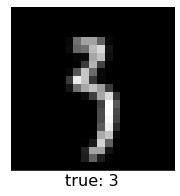

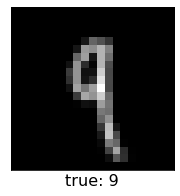

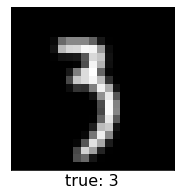

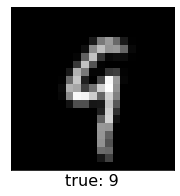

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
errorValue = 0
for j, k in enumerate(yhat_valid):
    #print(y_valid[j])
    #print(j, k)
    #okay, so we need to compare y_valid[j] to k
    if y_valid[j] != k:
        #Then we have a misclassified point.
        errorValue = j 
xvalError = X_valid[errorValue]
yvalError = y_valid[errorValue]
viewDigit = view_digit(xvalError, yvalError)
#Now to get the nearest neighbors
neighborVal = 3
n, m = knn.balltree.query([xvalError], neighborVal)
#print(n)
#print(m)
#print(m[0])
for val in m[0]:
    viewNeighbors = view_digit(X_train[val], y_train[val])

**Part E [7 points]**: **[4 points]** Create a plot of the accuracy of both Unweighted and Distance-Weighted KNN on the validation set on the same set of axes for $K=1, 2, \ldots, 20$ (feel free to go out to $K=30$ if your implementation is efficient enough to allow it).


**SOURCES USED:**

1 - (Understanding more about Weighted vs. Unweighted KNN) https://www.geeksforgeeks.org/weighted-k-nn/

In [22]:
acc = []
wacc = []
allks = range(1, 25)

# YOUR CODE HERE
# raise NotImplementedError()
for k in allks:
    #First initialize accuracy counts for each unweighted and weighted KNN
    weighted = 0
    unweighted = 0
    #First do the weighted KNN, pass in true to the function
    weightKnn = KNN(X_train, y_train, k, True)
    #Find y_hat of the weighted knn.
    weighted_y_hat = weightKnn.predict(X_valid)
    #Now do the unweighted KNN, pass in false to the function
    unweightKnn = KNN(X_train, y_train, k, False)
    #Find y_hat of the unweighted knn.
    unweighted_y_hat = unweightKnn.predict(X_valid)
    #Using the length of y_valid
    yValLen = len(y_valid)
    for j in range(yValLen):
        #If the weighted y_hat at j is equal to y_valid at j, then add one to the accuracy counter for weighted
        if(weighted_y_hat[j] == y_valid[j]):
            weighted = weighted + 1
        #Else, if the unweighted y_hat at j is equal to y_valid at j then add one to the accuracy counter for unweighted
        if(unweighted_y_hat[j] == y_valid[j]):
            unweighted = unweighted + 1
    #Now adjust the weighted value to be in decimal form
    weightedAdj = weighted*0.1
    wacc.append(weightedAdj)
    #Adjusting unweighted value to be in decimal form
    unweightedAdj = unweighted*0.1
    acc.append(unweightedAdj)

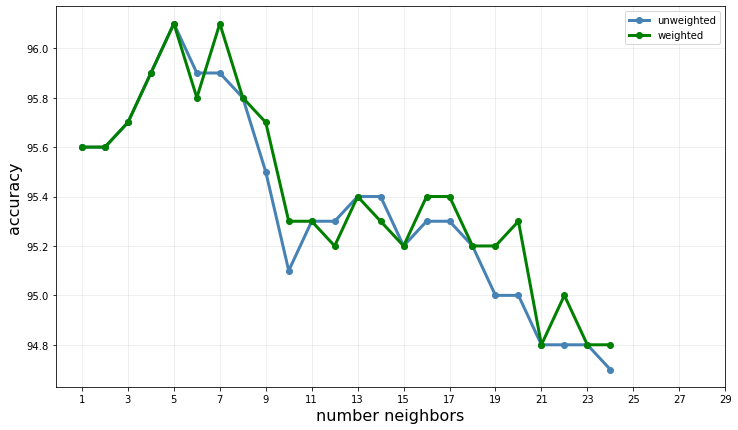

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.plot(allks, wacc, marker="o", color="green", lw=3, label="weighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
ax.legend(loc="upper right")
plt.xticks(range(1, 31, 2))
ax.grid(alpha=0.25)

**[4 points]** Based on the plot, answer the following questions: 

- For general $K$, does Unweighted or Weighted KNN appear to perform better? 
- Which value of $K$ attains the best accuracy on the validation set? 

Open questions: Why do you think this is the case? How can you explain this?

**(SOLUTION):**

It seems in general, $\textbf{weighted}$ KNN performs a little bit better than unweighted KNN does according to my graph. It also looks like a $K$ value of $5$ or $7$ performs really well! I think the reason that $\textbf{weighted}$ KNN has a slight edge over unweighted KNN is because the whole purpose of adding weights is to give more prevalence to the points which are nearby to the target point and less weight or importance to the points which are farther away which helps narrow down the scope a little when you're dealing with many, many neighbors. It's better to pay attention to what is nearby $\textbf{more}$ so than it is to pay attention to points that really aren't close to our target. $\checkmark$

### [30 points] Problem 3 - Polynomial Regression  and the Bias-Variance Trade-Off
***

In this problem you will use polynomial regression to explore the Bias-Variance Trade-Off. Assume that our data comes from a model of the form 

$$Y = f(X) + \epsilon ~~\textrm{ where }~~ \epsilon \sim N(0,\sigma^2)$$ 

For our experiments we'll use $f(x) = \sin(\pi x)$. The following functions can be used to generate data from this distribution:    

In [24]:
def get_f(x):
    """
    Returns sin(pi*x) for array of x values
    
    :@param x: ndarray of feature values
    """
    return np.sin(np.pi * x)

**Part A [6 points]**: **[3 points]** Generate a sample of size $n=20$ for $x$-values chosen from a uniform distribution between $0$ and $1$.

**SOURCES USED:**

1 - (Normal Values/Distribution in Python) https://www.sharpsightlabs.com/blog/numpy-random-normal/#:~:text=random.normal%20function%20is%20just%20one%20piece%20of%20a,Python%2C%20you%E2%80%99ll%20need%20to%20learn%20more%20about%20NumPy.

In [25]:
def get_y(x, sigma=1.0):
    """
    Returns y values based on the data generation process.
    Note the noise term.
    
    :@param x: ndarray of feature values
    """
    # YOUR CODE HERE
    normalVals = np.random.normal(0, sigma, len(x))
    result = get_f(x) + normalVals
    return result
    #raise NotImplementedError()
    
def sample(n, sigma=1.0):
    """Return tuples of data (x, y) that come from 
    the data generation process."""
    x = np.random.uniform(0, 1, size=n)
    y = get_y(x, sigma=sigma)
    return x, y

**[3 points]**: Make a scatter plot of the data overlayed with the curve of the true function $f(x)=\sin(\pi x)$. 

**SOURCES USED:**

1 - (Making Markers along Plot) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html

2 - (Understanding A-Range feature) https://realpython.com/how-to-use-numpy-arange/

3 - (Setting up Axis Labels) https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib

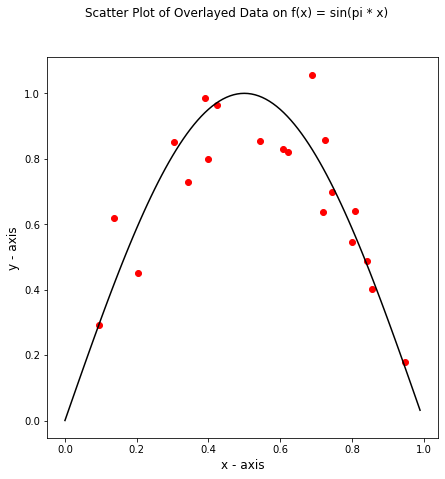

In [26]:
n = 20
x, y = sample(n, sigma=.15)
xplot = np.linspace(0, 1, 200)
fplot = get_f(xplot)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
# YOUR CODE HERE
#Red dot markers
ax.plot(x, y, "ro")
#0.01 gives the smoothest curve, 0.001 seemed a little too smooth, whereas 0.1 gave a very jagged looking curve.
bellCurve = np.arange(0, 1, 0.01)
fig.suptitle('Scatter Plot of Overlayed Data on f(x) = sin(pi * x)', fontsize = 'large')
ax.set_xlabel('x - axis', fontsize = 'large')
ax.set_ylabel('y - axis', fontsize = 'large')
ax.plot(bellCurve, get_f(bellCurve), "black") 
#raise NotImplementedError()

**Part B [6 points]**: **[3 points]** Next we need to create a function that can fit a polynomial model to training data and make predictions for unseen data.  Complete the function `poly_predict` below to accomplish this.  Note that there are many ways to do this in Python.  Later this week we'll look into doing this with Scikit-Learn.  You're free to implement it using Scikit-Learn, but you might want to look into Numpy's polynomial fitting functions, [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) and [polyval](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html).


**SOURCES USED:**

1 - (How to do a PolyFit with Np.Polyfit and Np.Poly1d) http://scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html

2 - (Poly1d) https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

In [27]:
def poly_predict(x_train, y_train, x_valid, deg):
    """
    Function to train polynomial regression model on training data
    and then return a vector of predictions on validation data
    
    :@param x_train: vector of training features
    :@param y_train: vector of training responses
    :@param x_valid: vector of validation features to make predictions with
    :@param deg: degree of the polynomial model 
    """
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    #"Fitting to Polynomial helps us plot noisy data and try and find their polynomial fit."
    poly = np.polyfit(x_train, y_train, deg)
    #Using Polyfit and Poly1d as shown in the website I used helps us find that fit on our data.
    val = np.poly1d(poly)
    #From this we get our prediction, it puts our test data into the val var which uses poly1d to create a polynomial from
    #our found polynomial above using polyfit.
    VectorPredict = val(x_valid)
    #Return this.
    return VectorPredict

**[3 points]**: Demonstrate that your function is working by using it to generate a plot that include the true function $f(x)$, a scatter plot of your training data, and the curve representing your fitted model. 

Text(0, 0.5, 'y - axis')

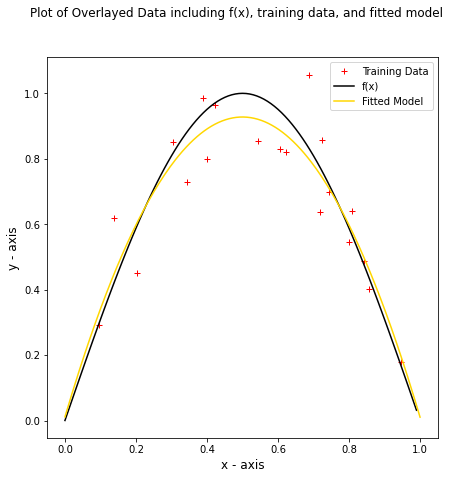

In [28]:
model_plot = poly_predict(x, y, xplot, 2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

# YOUR CODE HERE
# raise NotImplementedError()
#Red markers (plus), scatter plot of training data
ax.plot(x, y, "r+", label = "Training Data")
#True Function f(x) is our curve.
bellCurve = np.arange(0, 1, 0.01)
ax.plot(bellCurve, get_f(bellCurve), "black", label = "f(x)") 
#Fitted model plot
ax.plot(xplot, model_plot, "gold", label = "Fitted Model")
#Put the legend
ax.legend()
#Set Axis Titles and Title of Plot
fig.suptitle('Plot of Overlayed Data including f(x), training data, and fitted model', fontsize = 'large')
ax.set_xlabel('x - axis', fontsize = 'large')
ax.set_ylabel('y - axis', fontsize = 'large')

**Part C [12 points]**: Our goal now will be to make a plot of the decomposition of the expected validation MSE into it's constituent parts.  Recall that we showed in lecture that the expected test MSE can be written as 

$$
\textrm{E}\left[\left(y_0 - \hat{f}(x_0) \right)^2\right] = \left[~f(x_0) - \textrm{E}[~\hat{f}(x_0)~] \right]^2
+ \textrm{E}\left[ ~ \textrm{E}[~\hat{f}(x_0)]-\hat{f}(x_0)~\right]^2 + \textrm{Var}(\epsilon)
= \left[\textrm{Bias}(~\hat{f}(x_0)\right]^2 + \textrm{Var}(~\hat{f}(x_0)~) + \textrm{Var}(\epsilon)
$$

where $x_0$ represents unseen validation data. We're going to run simulations to estimate $\left[\textrm{Bias}(~\hat{f}(x_0)\right]^2$ and $\textrm{Var}(~\hat{f}(x_0)~)$ for different polynomial models and then plot them against estimates of the true validation MSE. The function `bias_variance_study` below will help you do this.  You just need to fill in a few key parts.  At the end of the day, you should have a plot for each combination of the simulation parameters.  

The $\textrm{Bias}^2$ term is given by 

$$
\left[\textrm{Bias}(~\hat{f}(x_0)\right]^2 = \left[~f(x_0) - \textrm{E}[~\hat{f}(x_0)~] \right]^2
$$

The first term inside the square,$~f(x_0)$, is simply the true function $f$ evaluated on the validation data.  The second term inside the square, $\textrm{E}[~\hat{f}(x_0)~]$, is the expected value of all estimated models evaluated on the validation data.  We can estimate this by sampling many many training sets, fitting models, evaluating them on many validation sets, and then taking the average. 

The next step is to estimate the $\textrm{Variance}$.  Let's unpack it 

$$
\textrm{E}\left[ ~ \hat{f}(x_0) - \textrm{E}[~\hat{f}(x_0)]~\right]^2
$$

Note that $\textrm{E}[~\hat{f}(x_0)]$ is the `mean_model` we got from the `squared_bias` function. The other term, $\hat{f}(x_0)$, is a model estimated on a random training set, and then evaluated on the validation set.  Since we're wrapping this whole thing in an expectation, we're going to sample many many training sets, estimate $\hat{f}(x_0)$, and then compute the mean squared deviation between these and the `mean_model`. 

You will add code to the function below to accomplish this. The plotting part is completed for you. Follow the instructions in the comments below to write two loops.

In the first loop, you need to train models of different degrees on the training set and record their validation predictions. You also need to calculate the validation MSE of each model.

In the second loop, you need to calculate for each degree the squared bias, the variance, and the mean validation MSE across all the simulations.

**SOURCES USED:**

1 - (Enumeration) https://www.geeksforgeeks.org/enumerate-in-python/

2 - (Numpy Mean Function) https://numpy.org/doc/stable/reference/generated/numpy.mean.html

3 - (Understanding how to Slice in Python) https://stackoverflow.com/questions/33491703/meaning-of-x-x-1-in-python/33491724

4 - (Refresher on Mathematical Notation) https://www.pythoncentral.io/using-exponents-python/

Mean difference between MSE and Bias**2 + variance with sigma=0.4:  0.16888508443081085


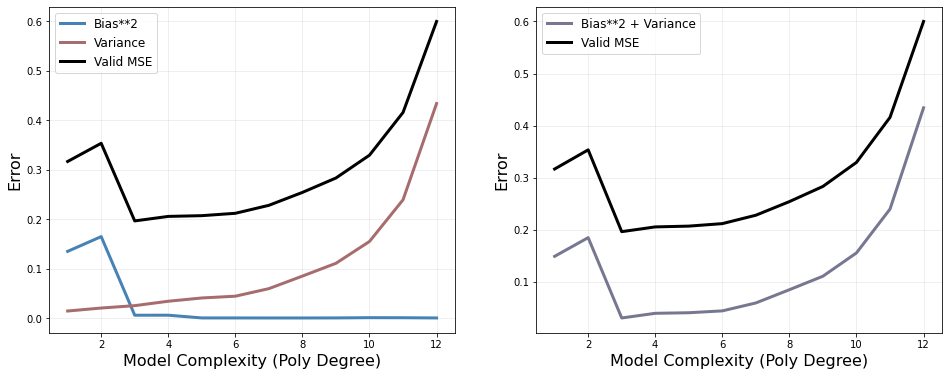

In [29]:
def bias_variance_study(num_data, num_sims, train_frac=0.8, sigma=0.4, max_deg=10, random_state=1234):
    '''
    Function to run simulations and estimate the squared-bias, variance, and 
    validation error of polynomial regression models. 
    
    :@param num_data: number of points in simulated data set 
    :@param num_sims: number of simulations to run 
    :@param train_frac: fraction of total data in training set
    :@param sigma: standard deviation of noise in data 
    :@param max_deg: largest degree polynomial to analyze
    :@param random_state: seed for random state, for reproducibility
    '''
    # Set random seed 
    np.random.seed(random_state)
    
    # array of polynomial degrees
    degrees = range(1, max_deg + 1)
    
    # train/valid split sizes 
    num_train = int(np.ceil(train_frac * num_data))
    num_valid = num_data - num_train
    
    # Generate grid of features and shuffle them 
    x_grid = np.linspace(-1, 1, num_data)
    np.random.shuffle(x_grid)
    
    # Spit into training and validation sets 
    x_train = x_grid[:num_train]
    x_valid = x_grid[num_train:]
    
    # Dictionaries for predictions and MSE measurements
    # Keys are polynomial degree. Each prediction is column 
    # of nValid x num_sims array. Each mse is entry in vector
    # of length num_sims 
    y_hat_valid = {deg: np.zeros((num_valid, num_sims)) for deg in degrees}
    mses_valid = {deg: np.zeros(num_sims) for deg in degrees}
    
    # Loop over num_sims simulated data sets
    for sim in range(num_sims):
        
        # Generate training and validation responses 
        y_train = get_y(x_train, sigma=sigma)
        y_valid = get_y(x_valid, sigma=sigma)
        
        # Loop over polynomial degree. Use function from part B 
        # to fit to training set and predict on validation set.
        # Store predictions those predictions in yHatValid[deg]
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        for i in degrees:
            #Store prediction into the y_hat_valid variable.
            predictions = poly_predict(x_train, y_train, x_valid, i)
            y_hat_valid[i][:,sim] = predictions
            #Store mse values into the mses_valid variable
            #Compute the var to put into the mean function
            meanVar = (y_valid - y_hat_valid[i][:,sim])**2
            mses_valid[i][sim] = np.mean(meanVar)
    
    # Loop over each polynomial degree and compute squared-bias, variance, 
    # and mean MSE on validation set.  
    bias_squared, variance, mse_valid = np.zeros(max_deg), np.zeros(max_deg), np.zeros(max_deg) 

    # YOUR CODE HERE
    # raise NotImplementedError()
    for i, var in enumerate(degrees):
        #Find Variance term, take mean of y_hat_valid
        variance[i] = np.mean(np.var(y_hat_valid[var], axis = 1))
        #Find MSE Term, take mean of mses_valid
        mse_valid[i] = np.mean(mses_valid[var])
        #Now to get our Bias Squared Term.
        #Get our x_valid
        var1 = get_f(x_valid)
        #Take the mean of our y_hat_valid var
        mean1 = np.mean(y_hat_valid[var], axis = 1)
        #Bias squared at index i then equals difference of both parts squared.
        bias_squared[i] = np.mean((var1 - mean1)**2)
        
    # Plot squared bias, variance, and validation MSE 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    ax1.plot(degrees, bias_squared, color="steelblue", lw=3, label="Bias**2")
    ax1.plot(degrees, variance, color="#a76c6e", lw=3, label="Variance")
    ax1.plot(degrees, mse_valid, color="black", lw=3, label="Valid MSE")
    ax1.grid(alpha=0.25)
    ax1.set_xlabel("Model Complexity (Poly Degree)", fontsize=16)
    ax1.set_ylabel("Error", fontsize=16)
    ax1.legend(loc="upper left", fontsize=12)
    ax2.plot(degrees, bias_squared + variance, color="#777791", lw=3, label="Bias**2 + Variance")
    ax2.plot(degrees, mse_valid, color="black", lw=3, label="Valid MSE")
    ax2.grid(alpha=0.25)
    ax2.set_xlabel("Model Complexity (Poly Degree)", fontsize=16)
    ax2.set_ylabel("Error", fontsize=16)
    ax2.legend(loc="upper left", fontsize=12)
    print("Mean difference between MSE and Bias**2 + variance with sigma={}: ".format(sigma), 
          np.mean(mse_valid-bias_squared-variance))
    
    # Return arrays of squared-Bias, variance, and MSE 
    return bias_squared, variance, mse_valid
    
        
bias_squared, variance, mse_valid = bias_variance_study(30, 500, train_frac=0.80,
                                                        sigma=0.4, max_deg=12,
                                                        random_state=1241)

**Part D [6 points]**: When everything is working, increase the size of the simulated data sets and the number of simulation runs for more precision in our approximation. (For example, `num_data=50`, `num_sims=5000`) Now we want to study how the standard deviation of the model noise affects our analysis. Try several values of $\sigma$. Compare the mean differences between the validation MSE and the sum of the squared-Bias and the Variance . What do you notice?  How can you explain this result using the notions of Bias-Variance and Reducible and Irreducible error discussed in class?   

**(SOLUTION):**

As seen below by my charted examples of increasing sigma, the Mean Difference between the MSE and the sum of Variance + Bias$^2$ increases. Why is this? Well, for most data sets, having a lower poly degree will give you a higher bias, and as you start increasing your poly degree, the bias decreases and you will notice that your model starts to fit a lot better. The more you start to increase your poly degree, yes Bias is low, but Overfitting and Variance run high. If you increase how much data you put in, your variance will increase slowly as your poly degree goes up. Because of this, our Reducible Error is lessened. Putting my observations together, I see that models that are very sensitive will have low bias, and a high variance, and models that aren't will have a high bias but low variance. As Sigma, the Standard Deviation increases, then irreducable error increases. $\checkmark$

Mean difference between MSE and Bias**2 + variance with sigma=0.2:  0.042352295678083164
Mean difference between MSE and Bias**2 + variance with sigma=0.5:  0.2637191637101666
Mean difference between MSE and Bias**2 + variance with sigma=0.9:  0.8535067135142006


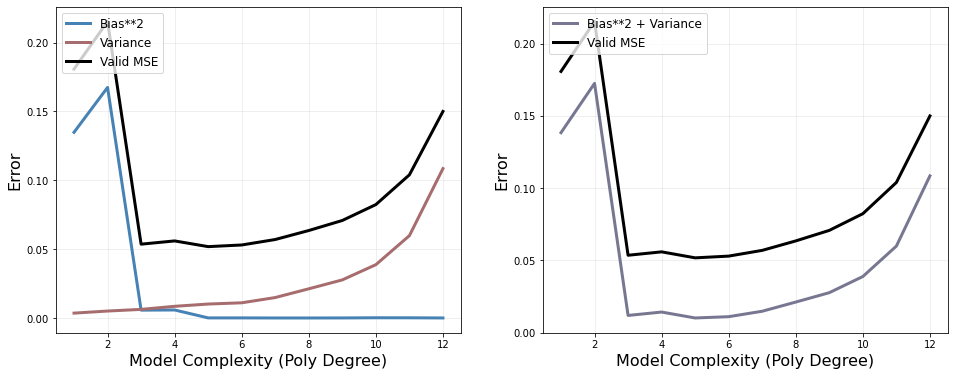

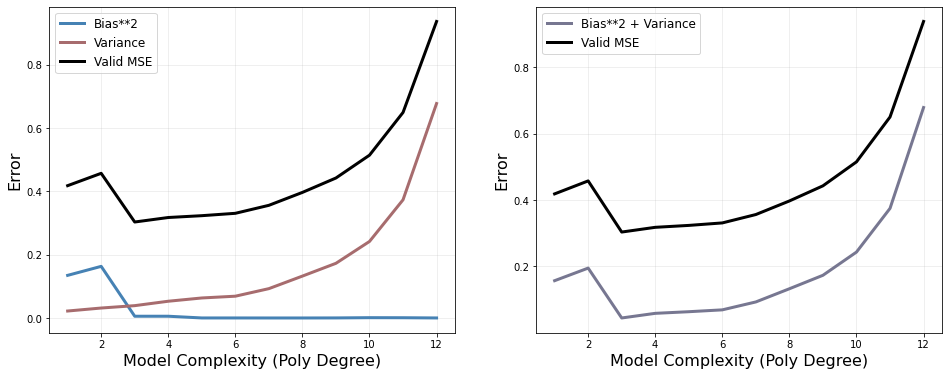

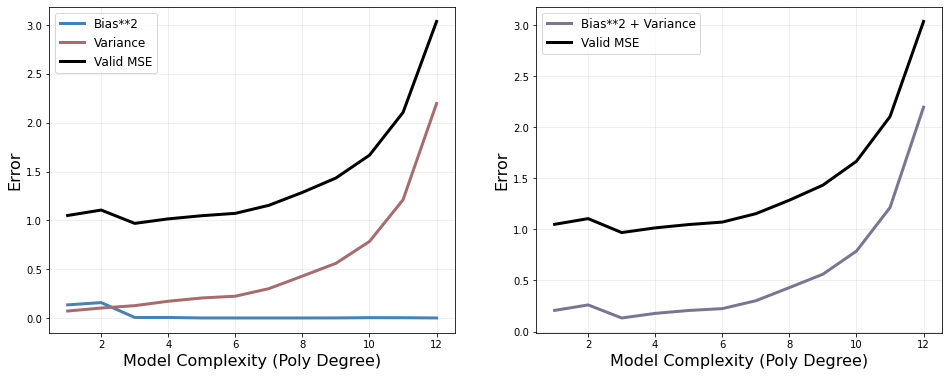

In [30]:
# YOUR CODE HERE
#raise NotImplementedError()

#Trying different Sigma Values
bias_squared, variance, mse_valid = bias_variance_study(30, 500, train_frac=0.80,
                                                        sigma=0.2, max_deg=12,
                                                        random_state=1241)

bias_squared, variance, mse_valid = bias_variance_study(30, 500, train_frac=0.80,
                                                        sigma=0.5, max_deg=12,
                                                        random_state=1241)

bias_squared, variance, mse_valid = bias_variance_study(30, 500, train_frac=0.80,
                                                        sigma=0.9, max_deg=12,
                                                        random_state=1241)

### [5 points] Problem 4: Syllabus quiz
***

Please read the [syllabus](https://github.com/BoulderDS/CSCI-4622-Machine-Learning-fa20/blob/master/info/syllabus.md) carefullly and finish the [Syllabus quiz](https://docs.google.com/forms/d/e/1FAIpQLSc02WXElDIhHrp2GY1Pf1D5qI2LVUr12a0HgVuP3unenLT1MQ/viewform?usp=pp_url). You do not need to answer anything here. The Markdown cell is only for grading convenience.

**(SOLUTION):**

Completed Syllabus Quiz! $\checkmark$

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://docs.google.com/forms/d/e/1FAIpQLScy3B9xtnkqziMjoo995YUR0pNcVw04IHgRixxaWfHUdZ1xiw/viewform?usp=pp_url) to solicit your feedback for how to improve the course.